# PS2 solutions

In [2]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import sklearn.datasets
import pandas as pd

## Part 1
### Problem 1

In [3]:
the_rng = np.random.default_rng(seed=7)

### Problem 2

In [4]:
num_samples = 60
x1 = the_rng.uniform(-10., 100., num_samples)
x2 = the_rng.normal(7.0, 10.0, num_samples)
x3 = the_rng.uniform(1000., 5000., num_samples)
y = 3*x1 + 5*x2 - 10*x3
big_X = np.ones(60)
print(x1.shape, x2.shape, x3.shape, y.shape, big_X.shape)

(60,) (60,) (60,) (60,) (60,)


### Problem 3

Since our matrix is not square, MATLAB's `mldivide()` function will call least squares to compute a solution to the underdetermined system matrix.  The NumPy equivalent is: https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

Least squares should provide the solution for $\mathbf{A}x = b$, which would give the weights that are applied to $\mathbf{X} \omega = y$.

### Problem 4

Follow the example in the `np.linalg.lstsq()` documentation:

In [7]:
big_X = np.vstack((x1, x2, x3, np.ones(num_samples))).T  # NOTE: np.vstack() creates a new axis

LSM = np.linalg.lstsq(big_X, y)
LSM

C:\Users\Agonz\AppData\Local\Temp\ipykernel_21488\1507434731.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  LSM = np.linalg.lstsq(big_X, y)


(array([ 3.00000000e+00,  5.00000000e+00, -1.00000000e+01, -4.57274583e-12]),
 array([5.60354832e-21]),
 4,
 array([2.57057969e+04, 2.63036716e+02, 6.35859940e+01, 2.41234762e+00]))

In [8]:
print(LSM[0])

[ 3.00000000e+00  5.00000000e+00 -1.00000000e+01 -4.57274583e-12]


### Problem 5

The return values, as defined in the documentation, are the solution vector, residuals, rank, and singular values.  You can see that, despite adding the potential constant term in our system matrix, the weight associated with the constant term is essentially zero (to the -13 power).

Use the solution vector (which matches the coefficients in the original y equation we used to generate our sample data) to multiply any vector of $[x_1\quad x_2\quad x_3]$ (with or without the constant term) to get the response (dependent) variable $y$.

## Part 2

### Problem 1

`statsmodels` should return pretty much the same weights, although the constant term's weight (which is already quite small) may be different since some degrees of freedom are removed for statistical power.  This also shows the importance of scaling -- although we know in the scheme of the current scales of $x_1, x_2, x_3$, and $y$ that the constant term is very small, there are many cases in engineering where nano- prefixes are used in which the constant term would not be considered small.

In [9]:
lin_model = sm.OLS(exog=big_X, endog=y)
lin_res = lin_model.fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.674e+29
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:04:11   Log-Likelihood:                 1286.8
No. Observations:                  60   AIC:                            -2566.
Df Residuals:                      56   BIC:                            -2557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.0000   5.02e-13   5.98e+12      0.0

### Problem 2

In [3]:
bunch_ca_housing = sklearn.datasets.fetch_california_housing(as_frame=True)
df_ca_housing_X = bunch_ca_housing["data"]
print(df_ca_housing_X.describe())
df_ca_housing_y = bunch_ca_housing["target"]
print(df_ca_housing_y.describe())

             MedInc      HouseAge  ...      Latitude     Longitude
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...     35.631861   -119.569704
std        1.899822     12.585558  ...      2.135952      2.003532
min        0.499900      1.000000  ...     32.540000   -124.350000
25%        2.563400     18.000000  ...     33.930000   -121.800000
50%        3.534800     29.000000  ...     34.260000   -118.490000
75%        4.743250     37.000000  ...     37.710000   -118.010000
max       15.000100     52.000000  ...     41.950000   -114.310000

[8 rows x 8 columns]
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


### Problem 3

             MedInc      HouseAge  ...     Longitude   MedHouseVal
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]


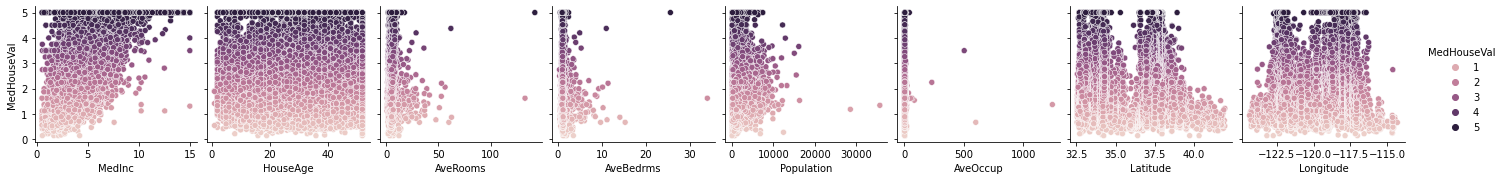

In [22]:
# make a non-copy frame that joins X and y for visualization
df_ca_housing_all = pd.concat((df_ca_housing_X, df_ca_housing_y), axis='columns', copy=False)
print(df_ca_housing_all.describe())

sns.pairplot(data=df_ca_housing_all, y_vars="MedHouseVal", hue="MedHouseVal")

Looks like Median Income (MedInc), Latitude, and Longitude are all decent predictors of MedHouseVal.  House age, surprisingly, does not seem to matter.

### Problem 4

The pipeline should be drawn in draw.io (app.diagrams.net).  You should make sure to remove any NaN values and feel free to make any other adjustments as necessary.  This is a simpler pipeline so it's really just for practice for future problems.

You will also notice that there are a few outliers in the dataset (such as a couple houses that have over 100 rooms?!).  You can either remove them (assume errant data) by filtering or dropping rows that match the outlier criteria, or just pick a linear modeling algorithm that can deal with the outliers (such as Ridge regression).

But based on asking Pandas, there aren't any NaNs in this nicely-curated dataset:

In [30]:
df_ca_housing_X.isna().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

### Problem 5

In [23]:
ca_housing_model = sm.OLS(exog=df_ca_housing_X, endog=df_ca_housing_y)
ca_housing_res = ca_housing_model.fit()
print(ca_housing_res.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):                        0.00
Time:                        10:34:55   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Looks like Population is being reported as an insignificant predictor.  Let's see what happens if we remove it and our likely confounded feature AveBedrms:

In [33]:
ca_housing_features = ["MedInc", "HouseAge", "AveRooms", "AveOccup", "Latitude", "Longitude"]
ca_housing_model_simpl = sm.OLS(exog=df_ca_housing_X[ca_housing_features], endog=df_ca_housing_y)
ca_housing_model_simpl_res = ca_housing_model_simpl.fit()
print(ca_housing_model_simpl_res.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                          2.724e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):                        0.00
Time:                        10:46:22   Log-Likelihood:                         -24499.
No. Observations:               20640   AIC:                                  4.901e+04
Df Residuals:                   20634   BIC:                                  4.906e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We see that our R2 is pretty similar, and now we are left with only stronger predictors.